Writing a research proposal!

Question 1
This dataset represents airbnb locations in the city of London and contains a number of interesting variables that I felt would be useful to predict airbnb prices. To go further I want to help the audience where good affordable locations would be in the city of London.

Question 2
Link to Dataset
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities


Question 3
For this research question I would like to observe the average or median price of airbnb stays based on the distance from the city center in the city of London and to determine the price based on how far or how close someone should stay at an airbnb.

Question 4 - Question 5
I plan to test the real sum price of an airbnb by dividing the distance from the city center of London into three groups.
Group 1: 0 to 3 km
Group 2: 3 to 6 km
Group 3: 6 to 9 km
I plan to perform a non-paramteric kruskal-wallis test.

Question 6 - Question 7
This proposal will be of interest to people who plan to travel to London and are looking for a way to save money and be on a budget.
This proposal should not be applied to other locations in the world because different places in the world may very on location.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

Running Analysis and results!

Perform data cleansing by merging weekend and weekday prices of airbnb locations as well as separating the distance variable into 3 groups that will be used to test the difference in prices.

In [2]:
df_weekdays = pd.read_csv('/content/airbnb_london_weekdays.csv')
df_weekends = pd.read_csv('/content/airbnb_london_weekends.csv')

frames = [df_weekdays, df_weekends]
df = pd.concat(frames)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  9993 non-null   int64  
 1   realSum                     9993 non-null   float64
 2   room_type                   9993 non-null   object 
 3   room_shared                 9993 non-null   bool   
 4   room_private                9993 non-null   bool   
 5   person_capacity             9993 non-null   float64
 6   host_is_superhost           9993 non-null   bool   
 7   multi                       9993 non-null   int64  
 8   biz                         9993 non-null   int64  
 9   cleanliness_rating          9993 non-null   float64
 10  guest_satisfaction_overall  9993 non-null   float64
 11  bedrooms                    9993 non-null   int64  
 12  dist                        9993 non-null   float64
 13  metro_dist                  9993 

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


Getting Derscriptive statistics for each variable.
The variable of interest dist has an average dist of 5.3 and a min dist of 0.04 and a max of 17.

In [3]:
df.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2512.390874,362.469256,2.846192,0.274992,0.387872,9.175023,90.645652,1.128790,5.326421,1.005547,295.448532,20.537398,627.541611,11.234105,-0.114830,51.503367
std,1467.505326,471.357265,1.246235,0.446533,0.487289,1.166180,11.510622,0.579477,2.712573,1.263926,171.401698,11.914575,389.000019,6.963803,0.067824,0.031734
min,0.000000,54.328653,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040553,0.013875,68.740487,4.778228,140.521722,2.515094,-0.251700,51.414400
25%,1249.000000,169.571250,2.000000,0.000000,0.000000,9.000000,87.000000,1.000000,3.549125,0.320943,177.577991,12.344088,383.553180,6.864961,-0.170680,51.486000
50%,2498.000000,261.294950,2.000000,0.000000,0.000000,10.000000,94.000000,1.000000,4.924121,0.530815,249.276621,17.327889,528.626061,9.465474,-0.118180,51.509710
75%,3747.000000,438.157059,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.836919,1.070676,361.410786,25.122161,770.026639,13.783694,-0.067600,51.525160
max,5378.000000,15499.894165,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321206,9.286229,1438.618956,100.000000,5587.136047,100.000000,0.120180,51.575820


Separating the data into three groups

DF_A is a dist less than 3

DF_B is a dist greater than 3 and less than 6

DF_C is a dist greeater than 6.

In [4]:
df_A = df[df['dist'] < 3]
df_B = df[(df['dist'] >= 3) & (df['dist'] < 6)]
df_C = df[df['dist'] >= 6]

df_A.info()
df_A.head()
df_B.info()
df_B.head()
df_C.info()
df_C.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 1 to 5363
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1779 non-null   int64  
 1   realSum                     1779 non-null   float64
 2   room_type                   1779 non-null   object 
 3   room_shared                 1779 non-null   bool   
 4   room_private                1779 non-null   bool   
 5   person_capacity             1779 non-null   float64
 6   host_is_superhost           1779 non-null   bool   
 7   multi                       1779 non-null   int64  
 8   biz                         1779 non-null   int64  
 9   cleanliness_rating          1779 non-null   float64
 10  guest_satisfaction_overall  1779 non-null   float64
 11  bedrooms                    1779 non-null   int64  
 12  dist                        1779 non-null   float64
 13  metro_dist                  1779 

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
40,40,220.372069,Private room,False,True,4.0,False,0,0,10.0,94.0,1,6.856222,0.527527,179.799006,12.498028,419.952321,7.519597,-0.22097,51.48847
43,43,181.565888,Private room,False,True,2.0,True,0,0,9.0,97.0,1,6.325159,2.282961,178.890006,12.434843,413.167520,7.398109,-0.17769,51.46089
47,47,134.528093,Private room,False,True,2.0,False,1,0,10.0,94.0,1,7.295441,1.393765,164.457995,11.431658,373.677180,6.691002,-0.22149,51.47904
56,56,318.681060,Entire home/apt,False,False,4.0,False,0,1,8.0,89.0,1,6.894330,0.477830,179.207541,12.456915,421.242015,7.542690,-0.22170,51.48875
65,65,132.176204,Private room,False,True,2.0,True,1,0,10.0,99.0,1,8.668165,1.665469,134.146129,9.324646,300.270727,5.376598,-0.23248,51.46620


After performing this tests for normality we can conclude that a non-parmatric test will preform better and using the median value should give a more accurate result than using the mean value.

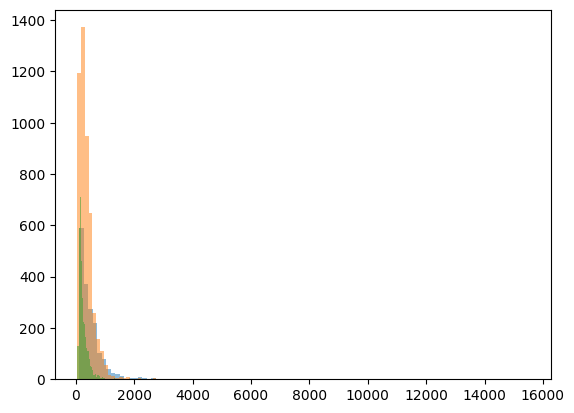

DescribeResult(nobs=1779, minmax=(114.77221947835083, 15499.894164961546), mean=541.9684677290254, variance=574704.3398372146, skewness=11.377919421847169, kurtosis=179.53510332622292)
DescribeResult(nobs=4826, minmax=(56.68054281615278, 12929.513864390035), mean=375.9072258737268, variance=199010.4076258886, skewness=17.517012138018178, kurtosis=454.60568091797836)
DescribeResult(nobs=3388, minmax=(54.32865307274395, 3874.9735412403866), mean=249.07470354318716, variance=40211.08849797235, skewness=6.316545371711101, kurtosis=81.86750525902175)


In [5]:
plt.hist(df_A['realSum'], alpha= 0.5, bins = 100)
plt.hist(df_B['realSum'], alpha= 0.5, bins = 100)
plt.hist(df_C['realSum'], alpha= 0.5, bins = 100)
plt.show()

print(stats.describe(df_A['realSum']))
print(stats.describe(df_B['realSum']))
print(stats.describe(df_C['realSum']))

<Axes: xlabel='realSum'>

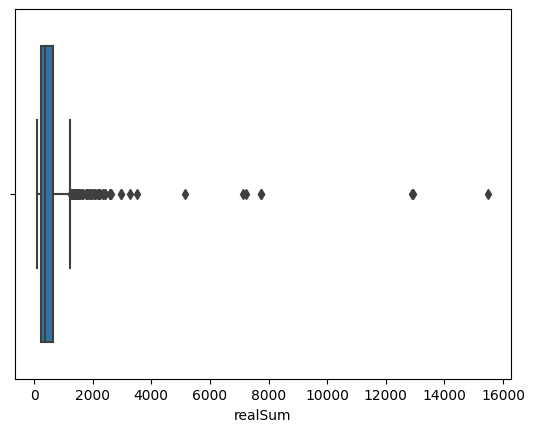

In [6]:
sns.boxplot(x= df_A['realSum'])

<Axes: xlabel='realSum'>

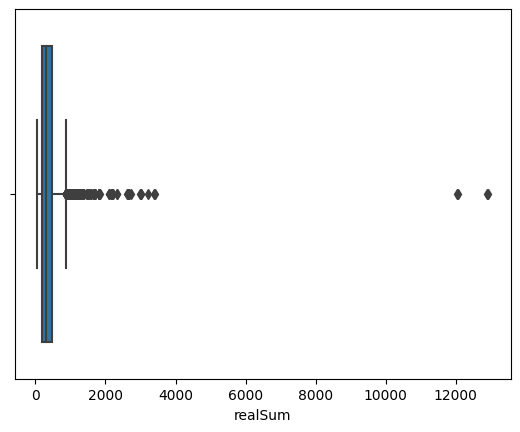

In [7]:
sns.boxplot(x= df_B['realSum'])

<Axes: xlabel='realSum'>

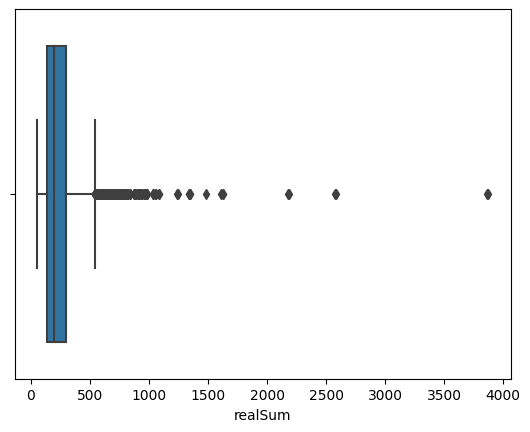

In [8]:
sns.boxplot(x= df_C['realSum'])

The analysis shows that there is a differnce in real sum price of the data between these three groups with significant and small p-value.

In [9]:
stats.kruskal(df_A['realSum'], df_B['realSum'], df_C['realSum'])

KruskalResult(statistic=1359.9481181066997, pvalue=4.909285799557448e-296)

In [10]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

Looking at the 95% confidence interval we can tell that the data could be skewed for these values causing an inaccurate value of the mean. To fix this we can remove outliers from the data or we can run a 95% median confidence interval.

In [11]:
get_95_ci(df_A['realSum'], df_B['realSum'])

'The difference in means at the 95% confidence interval (two-tail) is between -203.47035807209528 and -128.6521256385019.'

In [12]:
get_95_ci(df_B['realSum'], df_C['realSum'])

'The difference in means at the 95% confidence interval (two-tail) is between -141.11577458505735 and -112.54927007602195.'

In [13]:
get_95_ci(df_A['realSum'], df_C['realSum'])

'The difference in means at the 95% confidence interval (two-tail) is between -328.76325156471984 and -257.0242768069566.'

Mean Values

In [21]:
df_A['realSum'].mean()

541.9684677290254

In [22]:
df_B['realSum'].mean()

375.9072258737268

In [23]:
df_C['realSum'].mean()

249.07470354318716

Median Values

In [14]:
df_A['realSum'].median()

386.6506738164115

In [15]:
df_B['realSum'].median()

294.9269738234672

In [16]:
df_C['realSum'].median()

191.44382511347868

In [17]:
def median_ci(array_1):

  sample_1_n = array_1.shape[0]
  sample_1_median = array_1.median()
  j = (sample_1_n * 0.5) - (1.96 * (math.sqrt(sample_1_n * 0.5 * 0.5)))
  k = (sample_1_n * 0.5) + (1.96 * (math.sqrt(sample_1_n * 0.5 * 0.5)))
  j = math.ceil(j)
  k = math.ceil(k)
  df_lower = array_1['realSum'].sort_values().values[j]
  df_upper = array_1['realSum'].sort_values().values[k]
  return 'The 95% Confidence interval of the median values is between ' + str(df_lower) + ' and ' + str(df_upper) + '.'

In [18]:
median_ci(df_A)

<ipython-input-17-52e8a6fcc93b>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_1_median = array_1.median()


'The 95% Confidence interval of the median values is between 367.1299889461182 and 401.2323902255462.'

In [19]:
median_ci(df_B)

<ipython-input-17-52e8a6fcc93b>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_1_median = array_1.median()


'The 95% Confidence interval of the median values is between 286.9305486958771 and 302.4530210023754.'

In [20]:
median_ci(df_C)

<ipython-input-17-52e8a6fcc93b>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_1_median = array_1.median()


'The 95% Confidence interval of the median values is between 185.32891178061573 and 194.0309038312284.'

The median confidence interval shows that if you want to save the most money you should get a place 6 to 9 km away. To go deeper we might want to get a uber or lyft dataset to see what the daily price of a ride would be to visit places closer to the city center in London but this will suffice to show the price difference.